<h1>Libraries Import</h1> 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

<h1>Version Check</h1>

In [5]:
import sys
print(sys.version)

3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:17:27) [MSC v.1929 64 bit (AMD64)]


In [6]:
pd.__version__

'2.2.2'

In [8]:
np.__version__

'1.26.4'

In [12]:
sns.__version__

'0.13.2'

<h1>Diabetes.csv file read</h1>

In [15]:
df = pd.read_csv('Diabetes_Classification.csv')
df

,Unnamed: 0,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
0,0,50,F,24,4.20,0.90,2.40,1.40,46.0,4.70,0
1,1,26,M,23,3.70,1.40,1.10,2.10,62.0,4.50,0
2,2,33,M,21,4.90,1.00,0.80,2.00,46.0,7.10,0
3,3,45,F,21,2.90,1.00,1.00,1.50,24.0,2.30,0
4,4,50,F,24,3.60,1.30,0.90,2.10,50.0,2.00,0
...,...,...,...,...,...,...,...,...,...,...,...
5127,5127,54,M,23,5.00,1.50,1.24,2.98,77.0,3.50,1
5128,5128,50,F,22,4.37,2.09,1.37,2.29,47.3,4.40,1
5129,5129,67,M,24,3.89,1.38,1.14,2.17,70.6,4.73,1
5130,5130,60,F,29,5.91,1.29,1.73,2.85,50.2,7.33,1


<h1>Unique Values</h1>

In [18]:
df['Diagnosis'].unique()

array([0, 1], dtype=int64)

In [20]:
df['Age'].unique()

array([50, 26, 33, 45, 48, 43, 32, 31, 30, 49, 42, 39, 41, 44, 47, 36, 38,
       46, 35, 40, 59, 51, 57, 63, 25, 60, 77, 54, 34, 55, 28, 56, 52, 69,
       73, 61, 58, 53, 66, 68, 62, 64, 67, 70, 79, 76, 65, 75, 20, 71, 37,
       27, 85, 29, 78, 22, 74, 72, 24, 84, 80, 83, 82, 86, 93, 23, 87, 88,
       81, 90, 91], dtype=int64)

In [22]:
df['Gender'].unique()

array(['F', 'M', 'f'], dtype=object)

<h1>Data Preprocessing</h1>

In [25]:
df['Gender'] = df['Gender'].astype(str).str.strip().str.upper()
df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})
df['Gender'] = df['Gender'].astype(int)

<h1>Dataset Info</h1>

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5132 entries, 0 to 5131
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5132 non-null   int64  
 1   Age         5132 non-null   int64  
 2   Gender      5132 non-null   int32  
 3   BMI         5132 non-null   int64  
 4   Chol        5132 non-null   float64
 5   TG          5132 non-null   float64
 6   HDL         5132 non-null   float64
 7   LDL         5132 non-null   float64
 8   Cr          5132 non-null   float64
 9   BUN         5132 non-null   float64
 10  Diagnosis   5132 non-null   int64  
dtypes: float64(6), int32(1), int64(4)
memory usage: 421.1 KB


In [30]:
df.isnull().sum()

Unnamed: 0    0
Age           0
Gender        0
BMI           0
Chol          0
TG            0
HDL           0
LDL           0
Cr            0
BUN           0
Diagnosis     0
dtype: int64

In [32]:
df['Gender'].unique()

array([0, 1])

In [34]:
print(df['Diagnosis'].value_counts())

Diagnosis
0    3139
1    1993
Name: count, dtype: int64


In [36]:
df.shape

(5132, 11)

<h1>Drop Tables</h1>

In [39]:
df = df.drop(columns=['Unnamed: 0'])
df

,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
0,50,0,24,4.20,0.90,2.40,1.40,46.0,4.70,0
1,26,1,23,3.70,1.40,1.10,2.10,62.0,4.50,0
2,33,1,21,4.90,1.00,0.80,2.00,46.0,7.10,0
3,45,0,21,2.90,1.00,1.00,1.50,24.0,2.30,0
4,50,0,24,3.60,1.30,0.90,2.10,50.0,2.00,0
...,...,...,...,...,...,...,...,...,...,...
5127,54,1,23,5.00,1.50,1.24,2.98,77.0,3.50,1
5128,50,0,22,4.37,2.09,1.37,2.29,47.3,4.40,1
5129,67,1,24,3.89,1.38,1.14,2.17,70.6,4.73,1
5130,60,0,29,5.91,1.29,1.73,2.85,50.2,7.33,1


<h1>Data visualization</h1>

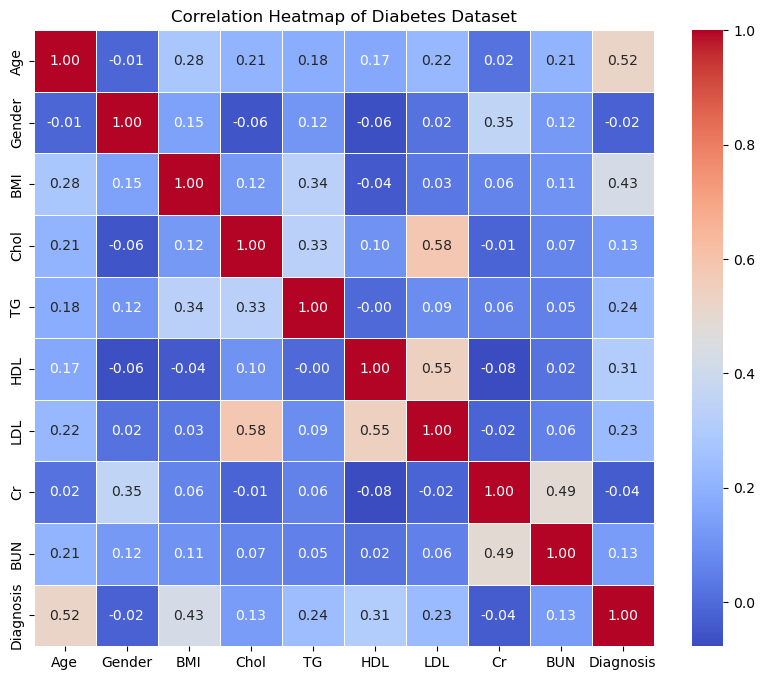

In [42]:
corr = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5
)

plt.title("Correlation Heatmap of Diabetes Dataset")
plt.show()

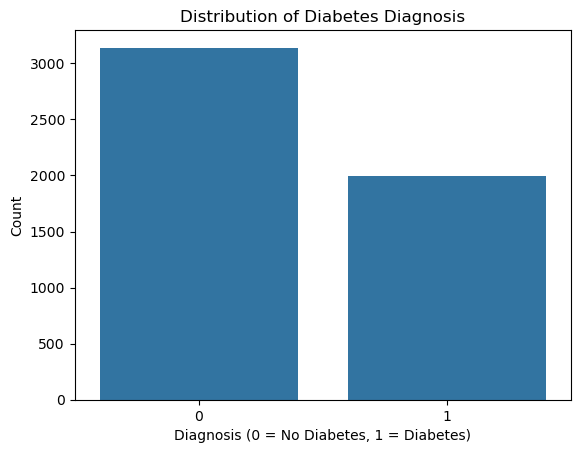

In [43]:
plt.figure()
sns.countplot(x='Diagnosis', data=df)

plt.xlabel('Diagnosis (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Count')
plt.title('Distribution of Diabetes Diagnosis')
plt.show()

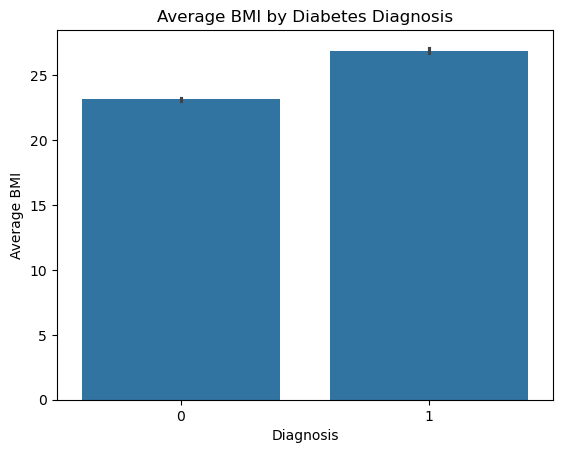

In [44]:
plt.figure()
sns.barplot(x='Diagnosis', y='BMI', data=df)

plt.xlabel('Diagnosis')
plt.ylabel('Average BMI')
plt.title('Average BMI by Diabetes Diagnosis')
plt.show()

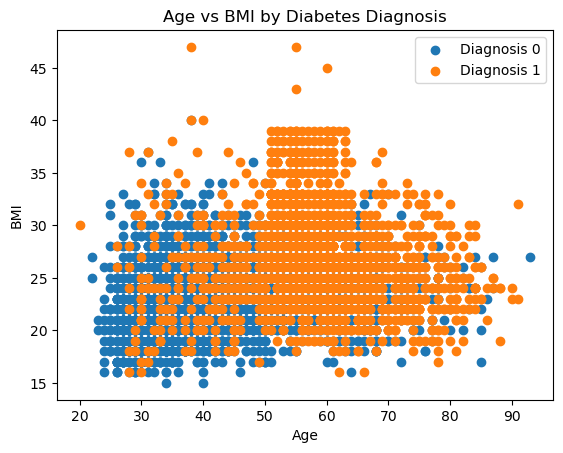

In [45]:
plt.figure()

for label in df['Diagnosis'].unique():
    subset = df[df['Diagnosis'] == label]
    plt.scatter(subset['Age'], subset['BMI'], label=f'Diagnosis {label}')

plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Age vs BMI by Diabetes Diagnosis')
plt.legend()
plt.show()

<h1>X and y train</h1>

In [49]:
X = df.drop(columns=['Diagnosis'])
X

,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN
0,50,0,24,4.20,0.90,2.40,1.40,46.0,4.70
1,26,1,23,3.70,1.40,1.10,2.10,62.0,4.50
2,33,1,21,4.90,1.00,0.80,2.00,46.0,7.10
3,45,0,21,2.90,1.00,1.00,1.50,24.0,2.30
4,50,0,24,3.60,1.30,0.90,2.10,50.0,2.00
...,...,...,...,...,...,...,...,...,...
5127,54,1,23,5.00,1.50,1.24,2.98,77.0,3.50
5128,50,0,22,4.37,2.09,1.37,2.29,47.3,4.40
5129,67,1,24,3.89,1.38,1.14,2.17,70.6,4.73
5130,60,0,29,5.91,1.29,1.73,2.85,50.2,7.33


In [51]:
y = df['Diagnosis']
y

0       0
1       0
2       0
3       0
4       0
       ..
5127    1
5128    1
5129    1
5130    1
5131    1
Name: Diagnosis, Length: 5132, dtype: int64

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train

,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN
3740,36,0,20,4.87,0.79,1.580000,2.980000,54.1,3.68
949,43,0,22,4.08,0.61,1.740000,2.030000,49.3,4.59
3826,25,1,20,4.60,1.00,1.330000,2.630000,80.0,4.25
19,33,0,24,4.20,1.50,1.200000,2.300000,62.0,5.30
3049,72,0,21,5.33,1.55,1.200000,2.940000,65.0,3.56
...,...,...,...,...,...,...,...,...,...
4426,58,1,27,4.98,2.48,4.860753,4.860753,68.3,6.24
466,63,1,30,3.60,5.10,0.900000,2.500000,63.0,5.90
3092,40,1,16,4.00,0.00,1.000000,2.000000,67.0,4.00
3772,42,1,23,4.00,0.80,1.120000,2.460000,96.0,5.49


In [57]:
y_train

3740    0
949     0
3826    0
19      0
3049    0
       ..
4426    1
466     1
3092    0
3772    0
860     0
Name: Diagnosis, Length: 4105, dtype: int64

In [59]:
X_test

,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN
5106,68,1,29,5.22,3.55,0.87,2.46,93.8,4.89
2186,28,0,22,4.38,1.17,1.39,1.87,46.0,4.00
2589,54,1,18,4.09,0.96,1.43,2.50,81.7,7.68
831,40,0,19,5.87,1.29,1.75,3.37,61.1,4.10
1421,41,0,22,4.50,0.50,1.75,1.94,52.0,3.12
...,...,...,...,...,...,...,...,...,...
1662,53,1,23,4.03,1.57,1.03,2.56,72.4,6.00
833,36,1,26,6.69,3.49,0.91,3.64,67.5,3.86
366,69,0,32,5.30,3.80,1.40,2.30,243.0,14.50
3778,30,1,19,4.11,1.27,1.27,2.40,88.8,6.11


In [61]:
y_test

5106    1
2186    0
2589    0
831     0
1421    0
       ..
1662    0
833     0
366     1
3778    0
1235    0
Name: Diagnosis, Length: 1027, dtype: int64

<h1>Logistic Regression Model Training</h1>

In [64]:
lr = LogisticRegression(max_iter=5000)
lr

LogisticRegression(max_iter=5000)

In [66]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [68]:
y_pred_lr = lr.predict(X_test)
y_pred_lr

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [70]:
# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.8023369036027264
[[529  75]
 [128 295]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       604
           1       0.80      0.70      0.74       423

    accuracy                           0.80      1027
   macro avg       0.80      0.79      0.79      1027
weighted avg       0.80      0.80      0.80      1027



<h1>SVM Classifier Model Training</h1>

In [73]:
svm = SVC(kernel='rbf', probability=True)
svm

SVC(probability=True)

In [75]:
svm.fit(X_train, y_train)

SVC(probability=True)

In [76]:
y_pred_svm = svm.predict(X_test)
y_pred_svm 

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [77]:
# Evaluation
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.8003894839337877
[[510  94]
 [111 312]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       604
           1       0.77      0.74      0.75       423

    accuracy                           0.80      1027
   macro avg       0.79      0.79      0.79      1027
weighted avg       0.80      0.80      0.80      1027



<h1>Random Forest Model Training</h1>

In [79]:
rf = RandomForestClassifier(n_estimators=100,random_state=42)
rf

RandomForestClassifier(random_state=42)

In [80]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [81]:
y_pred_rf = rf.predict(X_test)
y_pred_rf

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [82]:
# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8208373904576436
[[537  67]
 [117 306]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       604
           1       0.82      0.72      0.77       423

    accuracy                           0.82      1027
   macro avg       0.82      0.81      0.81      1027
weighted avg       0.82      0.82      0.82      1027



<h1>Diabetic Patient Predictor</h1>

In [84]:
# Example diabetic patient data
new_patient = pd.DataFrame([{
    'Age': 45,
    'Gender': 1,      # 1 = Male, 0 = Female
    'BMI': 28.4,
    'Chol': 210,
    'TG': 160,
    'HDL': 45,
    'LDL': 130,
    'Cr': 1.1,
    'BUN': 18
}])

In [85]:
# Predictions with Yes/No
print("Logistic Regression Prediction:", "Yes" if lr.predict(new_patient) == [1] else "No")
print("SVM Prediction:", "Yes" if svm.predict(new_patient) == [1] else "No")
print("Random Forest Prediction:", "Yes" if rf.predict(new_patient) == [1] else "No")

Logistic Regression Prediction: Yes
SVM Prediction: Yes
Random Forest Prediction: Yes


<h1>Non diabetic Patient Predictor</h1>

In [87]:
non_diabetic_patient = pd.DataFrame([{
    'Age': 50,
    'Gender': 0,      
    'BMI': 24,
    'Chol': 4.20,
    'TG': 0.90,
    'HDL': 2.40,
    'LDL': 1.40,
    'Cr': 46.0,
    'BUN': 4.70
}])

In [88]:
# Predictions
print("Logistic Prediction:", "Yes" if lr.predict(non_diabetic_patient) == [1] else "No")
print("SVM Prediction:", "Yes" if svm.predict(non_diabetic_patient) == [1] else "No")
print("Random Forest Prediction:", "Yes" if rf.predict(non_diabetic_patient) == [1] else "No")

Logistic Prediction: Yes
SVM Prediction: No
Random Forest Prediction: No


<h1>Accuracy Score</h1>

In [94]:
lr_accuracy = accuracy_score(y_test, y_pred_lr)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print("Logistic Regression Accuracy:", lr_accuracy)
print("SVM Accuracy:", svm_accuracy)
print("Random Forest Accuracy:", rf_accuracy)


Logistic Regression Accuracy: 0.8023369036027264
SVM Accuracy: 0.8003894839337877
Random Forest Accuracy: 0.8208373904576436


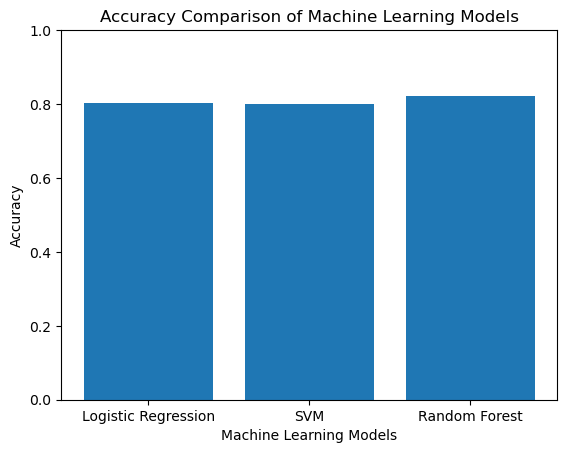

In [95]:
models = ['Logistic Regression', 'SVM', 'Random Forest']
accuracies = [lr_accuracy, svm_accuracy, rf_accuracy]

plt.figure()
plt.bar(models, accuracies)
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Machine Learning Models')
plt.ylim(0, 1)
plt.show()

<h1>Best Performing Algorithm</h1>

In [97]:
best_index = accuracies.index(max(accuracies))
best_model = models[best_index]
best_score = accuracies[best_index]

print("Best Performing Model:", best_model)
print("Best Accuracy Score:", best_score)


Best Performing Model: Random Forest
Best Accuracy Score: 0.8208373904576436


<h1>Best Performing Score Graph</h1>

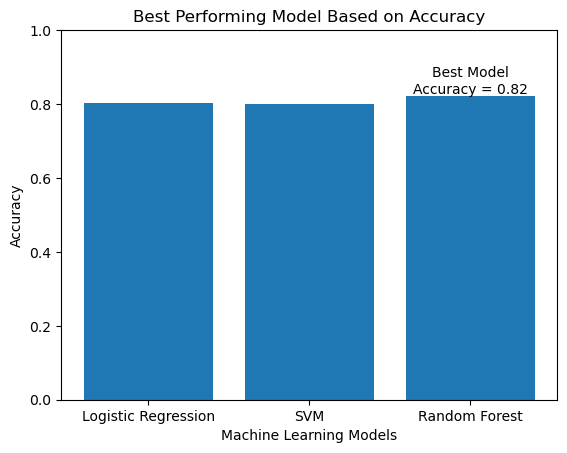

In [107]:
plt.figure()
plt.bar(models, accuracies)
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy')
plt.title('Best Performing Model Based on Accuracy')
plt.ylim(0, 1)

# Highlight best model with text
plt.text(best_index, best_score, 
         f'Best Model\nAccuracy = {best_score:.2f}',
         ha='center', va='bottom')

plt.show()

<h1>30 percent</h1>

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X_train

,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN
4582,69,0,25,5.58,2.26,1.440000,3.020000,67.7,4.66
217,60,1,37,4.70,1.30,0.900000,3.300000,60.0,3.50
4562,61,1,27,5.19,3.72,0.700000,3.200000,87.7,6.25
3934,54,0,23,7.70,0.90,4.860753,5.580000,74.0,3.09
1444,58,1,23,4.38,0.42,1.310000,2.390000,77.0,4.63
...,...,...,...,...,...,...,...,...,...
4426,58,1,27,4.98,2.48,4.860753,4.860753,68.3,6.24
466,63,1,30,3.60,5.10,0.900000,2.500000,63.0,5.90
3092,40,1,16,4.00,0.00,1.000000,2.000000,67.0,4.00
3772,42,1,23,4.00,0.80,1.120000,2.460000,96.0,5.49


In [113]:
y_train

4582    1
217     1
4562    1
3934    1
1444    0
       ..
4426    1
466     1
3092    0
3772    0
860     0
Name: Diagnosis, Length: 3592, dtype: int64

In [115]:
lr = LogisticRegression(max_iter=5000)
lr

LogisticRegression(max_iter=5000)

In [117]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [119]:
y_pred_lr = lr.predict(X_test)
y_pred_lr

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [121]:
# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.7993506493506494
[[793 120]
 [189 438]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       913
           1       0.78      0.70      0.74       627

    accuracy                           0.80      1540
   macro avg       0.80      0.78      0.79      1540
weighted avg       0.80      0.80      0.80      1540



In [123]:
svm = SVC(kernel='rbf', probability=True)
svm

SVC(probability=True)

In [125]:
svm.fit(X_train, y_train)

SVC(probability=True)

In [127]:
y_pred_svm = svm.predict(X_test)
y_pred_svm 

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [129]:
# Evaluation
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.7967532467532468
[[760 153]
 [160 467]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       913
           1       0.75      0.74      0.75       627

    accuracy                           0.80      1540
   macro avg       0.79      0.79      0.79      1540
weighted avg       0.80      0.80      0.80      1540



In [131]:
rf = RandomForestClassifier(n_estimators=100,random_state=42)
rf

RandomForestClassifier(random_state=42)

In [133]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [135]:
y_pred_rf = rf.predict(X_test)
y_pred_rf

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [137]:
# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8155844155844156
[[803 110]
 [174 453]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       913
           1       0.80      0.72      0.76       627

    accuracy                           0.82      1540
   macro avg       0.81      0.80      0.81      1540
weighted avg       0.81      0.82      0.81      1540

